# 银行贷款预测案例

在本案例中，我们将会学习使用人工智能技术分析银行客户贷款数据，并基于这个数据训练一个高斯朴素贝叶斯分类器，预测一个新客户是否会在银行贷款。我们会展示构建银行贷款预测分类器的全流程，包括数据预处理、特征选择、模型训练和模型评估。

此案例中，我们使用的数据集是银行客户信息数据集，数据集的字段描述如下：
* ID：客户ID
* Age：客户年龄
* Experience：工作年限
* Income：年度收入
* ZIP Code：邮政编码
* Family：家庭人数
* CCAvg：每月信用卡消费额
* Education：教育程度. 1: 大学未毕业; 2: 大学毕业生; 3: 研究生
* Mortgage：房屋抵押金额
* Personal Loan：用户是否有个人贷款?
* Securities Account：客户在该银行中是否有证券账户?
* CD Account：客户在该银行中是否有存款?
* Online：用户是否会使用网络银行?
* CreditCard：客户是否使用信用卡?

本案例将掌握通过人工智能分类算法，全流程构建一个银行贷款预测分类器方案。掌握如何使用华为云ModelArts Notebook上传数据、执行Python代码。掌握如何发现并处理银行客户信息中的噪声数据。掌握如何使用Python中seaborn库绘制银行客户信息特征相关性热力图，通过相关性分析进行特征选择。掌握使用Python中matplotlib库绘制银行客户信息的基本图形，如饼图。掌握构建分类器过程中的使用的工具函数，如sklearn提供的数据集切分函数train_test_split、准确率计算函数accuracy_score。掌握使用Python编程语言实现朴素贝叶斯分类器。

## 步骤

### 进入人工智能开发平台ModelArts界面

这步教大家如何进入人工智能开发平台华为云ModelArts服务。

第一步：点击“控制台”，如下图所示
![title](img/enter_modelarts_step1.png)

第二步：点击“所有服务”，如下图所示
![title](img/enter_modelarts_step2.png)

第三步：在“EI企业智能”大类下找到“ModelArts”，点击“ModelArts”，进入ModelArts服务主界面，如下图所示
![title](img/enter_modelarts_step3.png)

第四步：看到以下界面，说明成功进入了ModelArts服务主界面
![title](img/enter_modelarts_step4.png)



### 创建ModelArts Notebook

此步教大家如何在ModelArts中创建一个Notebook开发环境。ModelArts Notebook提供网页版的Python开发环境，无需用户自己搭建Python开发环境。

第一步：点击ModelArts服务主界面中的“开发环境”，如下图所示
![title](img/create_notebook_step1.png)

第二步：点击下图中的“创建”按钮
![title](img/create_notebook_step2.png)

第三步：填写创建Notebook所需的参数，并点击下一步，如下图所示



| 字段 |   内容     |
| -------- | -------------- |
| 计费方式     | 按需计费 |
| 名称     | Notebook实例名称，如bank_loan_prediction |
| 工作环境 | Python3     |
| 资源池   | 公共资源池     |
| 类型     | CPU            |
| 规格     | 2核 8GiB      |
| 存储配置 | EVS，磁盘规格5GB           |


第四步：点击下图中的“立即创建”
![title](img/create_notebook_step4.png)

第五步：点击下图中的“返回Notebook列表”
![title](img/create_notebook_step5.png)

第六步：等待Notebook创建成功，创建成功后状态会变成“运行中”，如下图所示
![title](img/create_notebook_step6.png)


### 在ModelArts Notebook中创建一个Notebook Python开发环境

第一步：点击下图所示的“打开”按钮，进入刚刚创建的notebook
![title](img/create_notebook_dev_step1.png)

第二步：创建一个Notebook Python语言开发环境。先点击“New”按钮，然后创建 XGBoost-Sklearn 开发环境

第三步：重命名刚刚创建的Notebook Python开发环境。点击“Untitle”，如下图所示
![title](img/create_notebook_dev_step2.png)

第四步：填写名称。我们可以填写一个跟本实验相关的名称，然后点击“Rename”按钮，如下图所示
![title](img/create_notebook_dev_step3.png)


### 如何在Notebook Python开发环境中写代码并执行代码

输入代码，然后点击run按钮执行代码，就可以看到输出hello notebook!，如下图所示
![title](img/type_code_step1.png)


**Notebook Python开发环境终于准备好了，现在可以在Notebook Python开发环境写代码啦**

### 案例配置信息填写

案例中需要将运行结果上传至OBS中，我们需要设置以下相关参数（使用自己真实的桶名和唯一ID替换掉*号）：

* BUCKET_NAME ： 自己的OBS桶名
* UNIQUE_ID : 唯一ID，填写自己的学号或者IAM子账号名称


In [1]:
BUCKET_NAME = '*' 
UNIQUE_ID = '*' 
OBS_BASE_PATH = BUCKET_NAME + '/' + UNIQUE_ID

### 初始化ModelArts SDK

In [2]:
from modelarts.session import Session
session = Session()

### 准备源代码和数据

这一步准备案例所需的源代码和数据，相关资源已经保存在OBS（华为云对象存储服务）中，我们通过ModelArts SDK将资源下载到本地，并解压到当前目录下。解压后，当前目录包含src和data两个目录，分别存有源代码和数据集。

会显示下载成功的日志。

In [3]:
session.download_data(bucket_path="ai-course-common-20/bank_loan_prediction/bank_loan_prediction.tar.gz", 
                      path="./bank_loan_prediction.tar.gz")

#  使用tar命令解压资源包
!tar xf ./bank_loan_prediction.tar.gz

Successfully download file ai-course-common-20/bank_loan_prediction/bank_loan_prediction.tar.gz from OBS to local ./bank_loan_prediction.tar.gz


### 导入基本工具库
执行下面方框中的这段代码，可以导入本次实验中使用的Python开发基本工具库。

matplotlib.pyplot是绘制基本图形的工具，seaborn绘制热力图的工具，pandas是文件读取和数据处理工具，numpy是数据分处理工具。

此段代码只是引入Python包，无回显（代码执行输出）。

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
# 在Notebook中显示matplotlib.pyplot的绘图结果
%matplotlib inline

### 数据读取并抽取特征和预测目标

使用pandas.read_excel(filepath, sheetname)方法读取Notebook中的数据文件。
* filepath：数据文件路径。
* sheetname: 指定数据集在Excel中所处的sheet。

此段代码无回显。

In [5]:
original = pd.read_excel('data/Bank_Personal_Loan_Modelling.xlsx', "Data")

# 抽取特征数据
feature = original.drop("Personal Loan",axis=1)
# 将数据集中的Personal Loan字段设为预测目标
target=original["Personal Loan"]

# 组合成完整的数据集
loans = feature.join(target)

### 展示样本数据
执行这段代码可以看到数据集的5个样本数据

In [6]:
loans.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


### 展示数据集统计信息
调用pandas.DataFrame.describe方法，可以看到各个特征的统计信息，包括样本数、均值、标准差、最小值、1/4分位数、1/2分位数、3/4分位数和最大值。transpose是矩阵的转置运算。

In [7]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


### 特征Experience的异常值处理
观察上面的数据集统计信息，发现特征Experience（工作年限）有负值，这是不符合常理的。我们对异常值进行处理，将值转换为其绝对值，并再次输出数据集统计信息。可以看到经过处理后，负值已经消失。

In [8]:
# 异常值处理
loans["Experience"] = loans["Experience"].apply(abs)

# 再次输出统计信息
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


### 数据类型转换
为了保证数据在计算过程中的精度，我们将数据类型转换为float64型。

然后打印特征的类型信息，可以看到各个特征都转换为了float64类型。

In [9]:
loans = loans.astype(float)

# 展示数据类型信息
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null float64
Age                   5000 non-null float64
Experience            5000 non-null float64
Income                5000 non-null float64
ZIP Code              5000 non-null float64
Family                5000 non-null float64
CCAvg                 5000 non-null float64
Education             5000 non-null float64
Mortgage              5000 non-null float64
Securities Account    5000 non-null float64
CD Account            5000 non-null float64
Online                5000 non-null float64
CreditCard            5000 non-null float64
Personal Loan         5000 non-null float64
dtypes: float64(14)
memory usage: 547.0 KB


### 数据类型转换后，重新抽取特征数据和预测目标
ID字段是一个自增的数据索引，无实际含义，所以删除。此段代码无回显。

In [10]:
feature = loans.drop(["ID","Personal Loan"],axis=1)
target = loans["Personal Loan"]

### 展示任意两个特征之间的相关性

此段代码通过seaborn绘制热力图，展示任意两个特征之间的相关性。数值的绝对值越高说明相关性越高。

观察特征相关性的目的是，如果发现两个特征相关性很高，那么在特征选择时，这两个特征至少有一个特征要被丢弃。

此段代码执行后，会有一张特征相关性热力图输出，可以发现Experience（工作年限）和Age（年龄）具有很高的相关性。

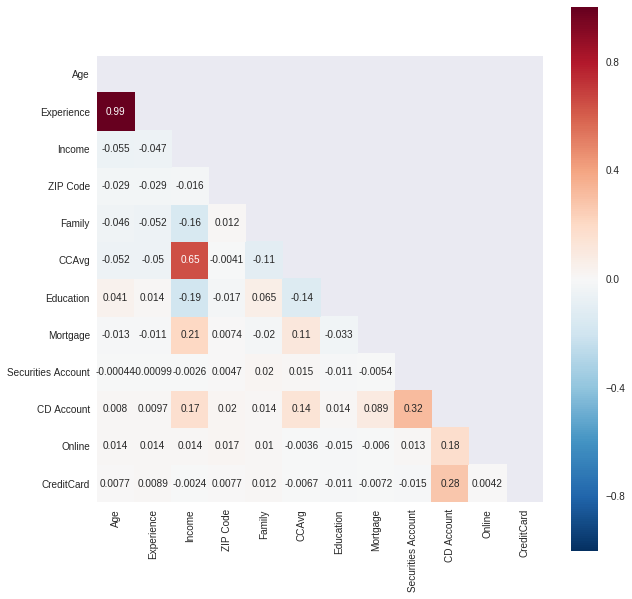

In [11]:
corr = feature.corr() # 计算任意两个特征的相关性矩阵

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# 绘制热力图
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask ,annot=True, square=True)

### 展示每个特征和预测目标之间的相关性

此段代码通过seaborn绘制热力图，展示每个特征和预测目标之间的相关性。数值的绝对值越高说明相关性越高，特征与预测目标之间的相关性数值越高，表示特征越重要。

如果特征的重要性不高，在特征选择时需要丢弃。

此段代码后会输出一张相关性热力图，可以发现Age, ZIP Code, Online, CreditCard这几个特征和预测目标相关性比较小，重要性较低。其实，从特征的含义也很好理解为什么这些特征重要性较低。

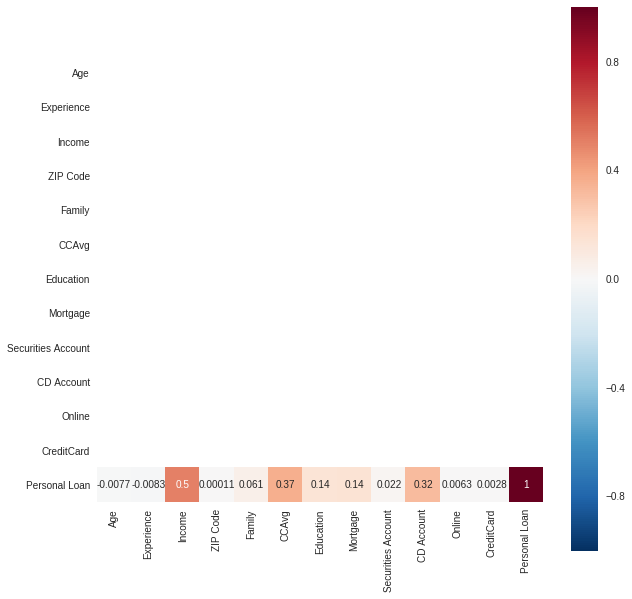

In [12]:
loans_corr = feature.join(target).corr()

mask = np.zeros((13,13))
mask[:12,:]=1

plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(loans_corr, annot=True, square=True, mask=mask)

### 统计预测目标Personal Loan 正负标签值数量
通过pandas.DataFrame内置的方法，统计正负标签值的数量。

可以看到0标签的数量是4520个，1标签的数量是480个。

In [13]:
source_counts = pd.DataFrame(loans["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
source_counts

,Labels,Personal Loan
0,0.0,4520
1,1.0,480


### 展示正负标签值分布饼状图
通过饼状图展示正负标签各自所占的比例。

可以在输出的饼状图中看到标签1所占的比例是9.6%。

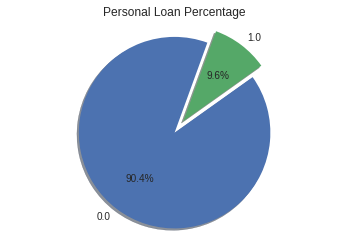

In [14]:
fig1, ax1 = plt.subplots()
# 将将第一块凸显出来，数值的大小是分割出来的与另一块的间隙
explode = (0, 0.15)
# 饼图的设置
ax1.pie(source_counts["Personal Loan"], explode=explode, labels=source_counts["Labels"], autopct='%1.1f%%',shadow=True, startangle=70)
ax1.axis('equal') 
# 设置图形标题
plt.title("Personal Loan Percentage")
# 显示图形
plt.show()

### 各个特征的数据分布
使用pandas.DataFrame.hist方法绘制各个特征的数据分布直方图。这是为了让大家对数据分布有一个直观的了解。

可以看到12个特征的直方图分布。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32ebcbd550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f32e806c198>]], dtype=object)

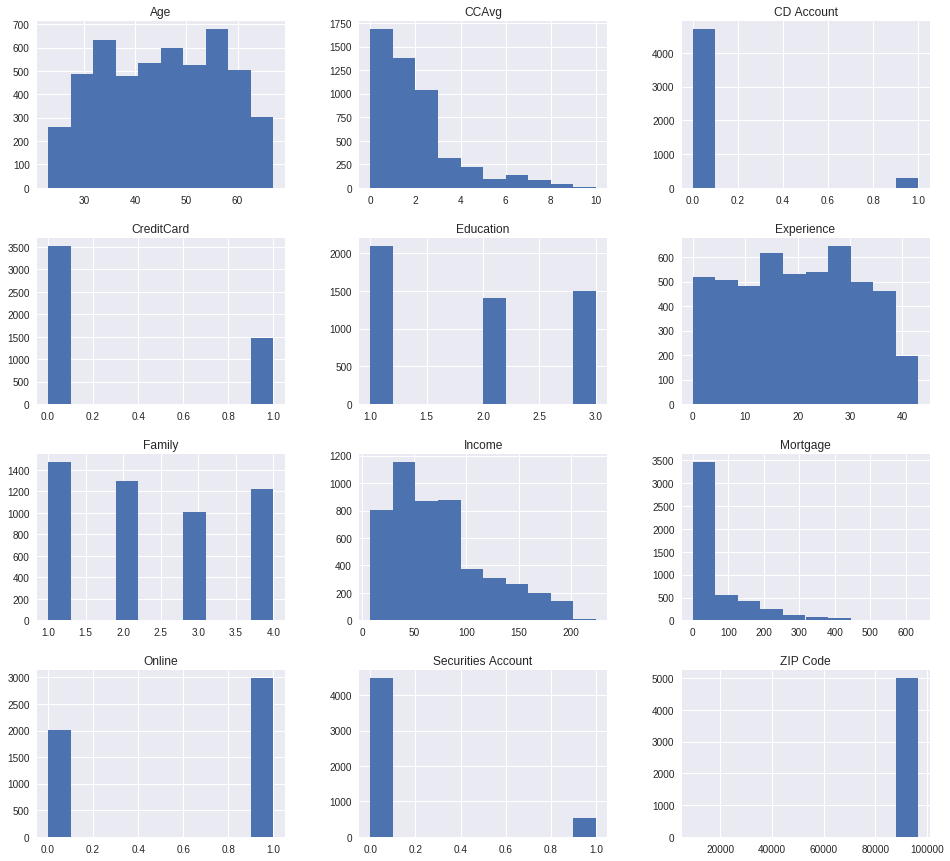

In [15]:
# figsize可以设置图像大小
feature.hist(figsize=(16,15))

### 特征选择
合理的特征选择可以降低模型的复杂度，提升模型的精度。

基于特征相关性分析和特征与预测目标相关性分析的结果，我们丢弃掉部分不重要的特征（ZIP Code, Age, Online, CreditCard）。并且打印剩余的特征。

可以看到剩余的特征有：Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD Account

In [16]:
feature = feature.drop(["ZIP Code","Age","Online","CreditCard"],axis=1)

# 打印剩余的特征
print(feature.columns)

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account'],
      dtype='object')


### 特征缩放
特征缩放是指将各个特征的值标准化。特征缩放的目的是消除特征值域大小对特征重要性的影响，从而让机器学习算法更加准确。

我们选择"Experience","Mortgage","Income","CCAvg"这几个特征来缩放，其他几个特征的值比较“标准”，无需缩放。

经过StandardScaler处理后的特征具有0均值、标准差为1的特点。观察缩放之后的数据集统计信息，可以发现缩放之后的特征均值为0、标准差为1。

In [17]:
from sklearn.preprocessing import StandardScaler # 特征缩放类
scaler = StandardScaler()

# 参与缩放的特征
colscal=["Experience","Mortgage","Income","CCAvg"]

scaler.fit(feature[colscal])
scaled_features = pd.DataFrame(scaler.transform(feature[colscal]),columns=colscal)

feature = feature.drop(colscal, axis=1)
feature = scaled_features.join(feature)

# 展示数据集统计信息
feature.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,1.001421e-16,1.000100,-1.764019,-0.887906,-0.011792,0.864321,2.003268
Mortgage,5000.0,2.810197e-16,1.000100,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Income,5000.0,1.939449e-16,1.000100,-1.428969,-0.755483,-0.212348,0.526315,3.263712
CCAvg,5000.0,1.245670e-17,1.000100,-1.108969,-0.708395,-0.250595,0.321653,4.613520
Family,5000.0,2.396400e+00,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
Education,5000.0,1.881000e+00,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Securities Account,5000.0,1.044000e-01,0.305809,0.000000,0.000000,0.000000,0.000000,1.000000
CD Account,5000.0,6.040000e-02,0.238250,0.000000,0.000000,0.000000,0.000000,1.000000


### 数据集划分
将数据集划分为训练数据和测试数据，我们将测试数据和训练数据的比值设为3:7。返回的X_train和y_train是训练数据的特征值和标签，X_test和y_test是测试数据的特征值和标签。

此段无回显。

In [18]:
from sklearn.model_selection import train_test_split # 数据集切分函数

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.30, random_state=101)

### 查看训练数据集的样本数和特征数

可以看到输出为(3500, 8)，说明训练数据集的样本数是3500个，并且特征数是8个。

In [19]:
X_train.shape

(3500, 8)

### 导入朴素贝叶斯分类器并创建分类器对象

导入的分类器是自己实现的高斯朴素贝叶斯分类器，源码见src目录下的bayes.py文件。

朴素贝叶斯算法大家应该比较熟悉，但是简单的朴素贝叶斯算法只能处理离散值，无法处理连续值。而高斯朴素贝叶斯算法假设数据服从高斯分布，这样就可以处理连续值了。

此段代码无回显。

In [20]:
# 引入分类器
from src.bayes import GaussianNB

# 新建高斯朴素贝叶斯分类器对象
clf_bayes = GaussianNB()

### 训练朴素贝叶斯分类器

根据训练数据训练一个高斯朴素贝叶斯分类器。源码见src目录下的bayes.py文件，大家可以查看学习。

训练完成可以看到日志输出：training done。

In [21]:
clf_bayes.fit(X_train, y_train)

training done.


### 朴素贝叶斯模型评估

根据测试集计算模型准确率，评估模型的好坏。

可以看到准确率的输出，准确率是0.87。

In [22]:
# 引入sklearn提供的计算准确率的工具函数
from sklearn.metrics import accuracy_score 

# 计算测试集的预测值
y_predict_bayes = clf_bayes.predict(X_test)

# 预测值和真实值比对，计算准确率
print('Accuracy :',accuracy_score(y_test, y_predict_bayes))

Accuracy : 0.878666666667


这是朴素贝叶斯分类器的预测结果，我们发现准确率并不是很高。接下来我们尝试训练其他的机器学习分类器，并对比效果。

### 导入并创建SVM分类器
SVM即支持向量机，是机器学习的经典算法之一。我们使用开源机器学习框架sklearn提供的SVM分类器。

此段代码无回显。

In [23]:
from sklearn.svm import SVC
clf_svc = SVC(gamma='auto')

### 训练SVM分类器

代码执行完成会输出一个训练好的SVM分类器对象。

In [24]:
clf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 评估SVM分类器

可以看到SVM分类器的准确率是0.97

In [25]:
# 计算测试集的预测值
y_predict_svc = clf_svc.predict(X_test)


# 预测值和真实值比对，计算准确率
print('Accuracy :',accuracy_score(y_test, y_predict_svc))

Accuracy : 0.976666666667


### 保存模型文件至OBS

我们将SVM分类器训练得到的模型文件保存至OBS，方便以后再使用。

#### 导出模型文件

训练得到模型可以导出至本地。会打印出保存的本地路径。

In [26]:
from sklearn.externals import joblib
import os

if not os.path.exists('results'):
    os.mkdir('results') # 创建本地保存路径

joblib.dump(clf_svc, "results/train_model_svc.m") # 导出模型文件至本地

['results/train_model_svc.m']

#### 上传模型文件至OBS

使用ModelArts SDK上传本地模型文件至OBS。可以看到上传成功的日志。

In [27]:
session.upload_data(bucket_path=OBS_BASE_PATH + '/bank_loan_prediction/results/', path='./results/train_model_svc.m')

Successfully upload file ./results/train_model_svc.m to OBS xuchao3/user2/bank_loan_prediction/results


<p style="font-family: Arial; font-size:1.4em;color:gold;">总结：该案例所在的OBS存储路径下，results目录下，有模型文件train_model_svc.m。</p>

通过朴素贝叶斯分类器和SVM分类器的准确率比较，发现前者比后者的准确率低了一些。虽然朴素贝叶斯分类器的准确率比其他分类器的效果要差些，但是朴素贝叶斯分类器也有优点，主要有以下几点：

1.朴素贝叶斯模型发源于古典数学理论，有稳定的分类效率。

2.对小规模的数据表现很好，能处理多分类任务，适合增量式训练，尤其是数据量超出内存时，我们可以一批批的去增量训练。

3.对缺失数据不太敏感，算法也比较简单。